In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv('/content/mushrooms.csv')

In [50]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [51]:
data['class'] = data['class'].replace(['e','p'],[0,1])

In [52]:
for col in data:
  if col != 'class':
    data = pd.get_dummies(data,columns=[col],drop_first=True)

In [53]:
for col in data:
  data[col] = pd.to_numeric(data[col])

In [54]:
data.dtypes

class          int64
cap-shape_c    uint8
cap-shape_f    uint8
cap-shape_k    uint8
cap-shape_s    uint8
               ...  
habitat_l      uint8
habitat_m      uint8
habitat_p      uint8
habitat_u      uint8
habitat_w      uint8
Length: 96, dtype: object

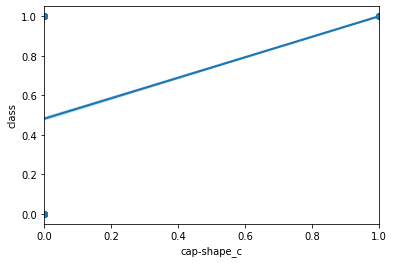

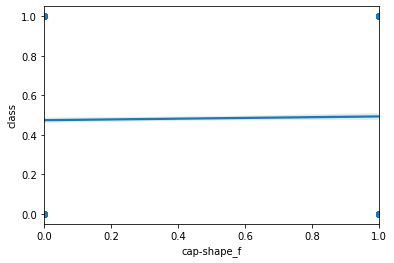

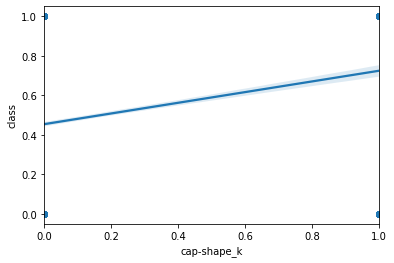

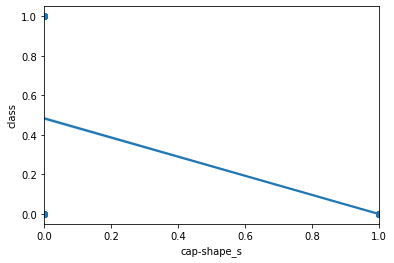

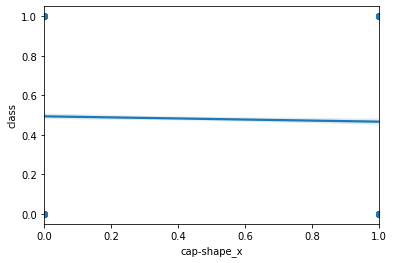

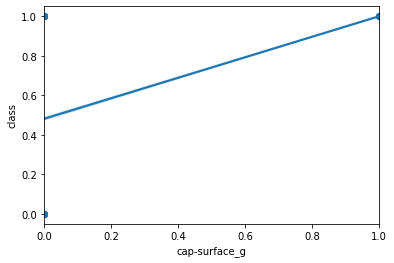

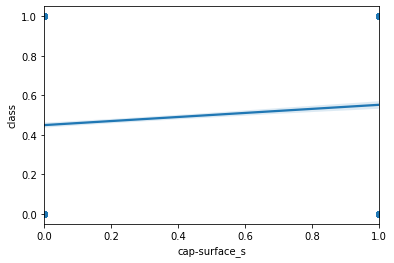

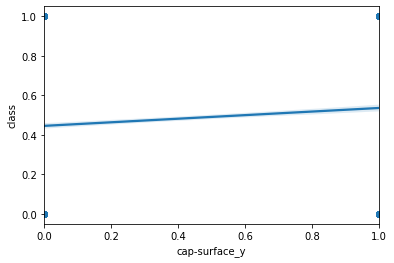

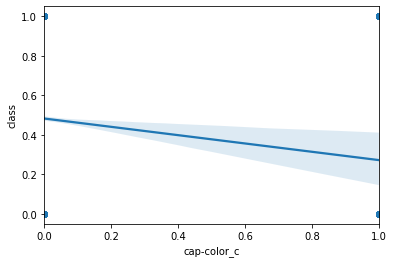

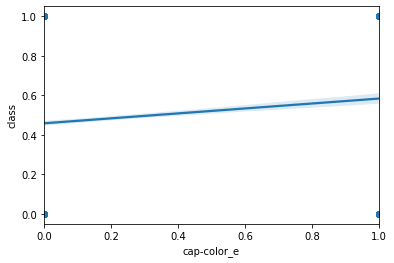

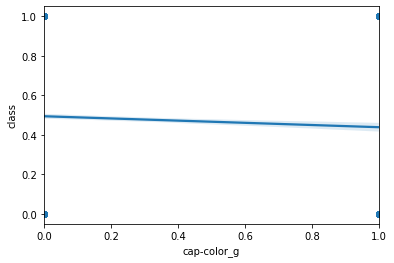

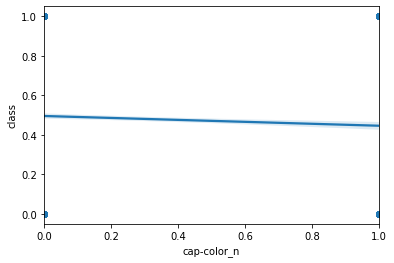

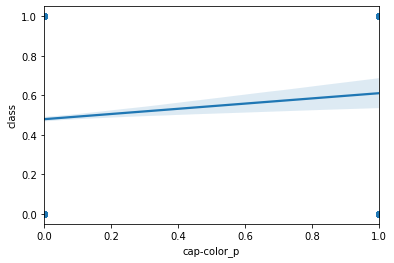

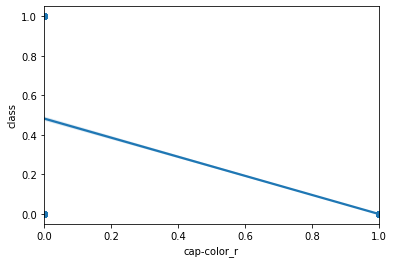

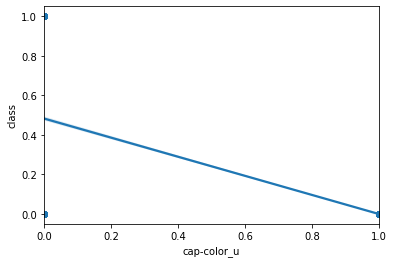

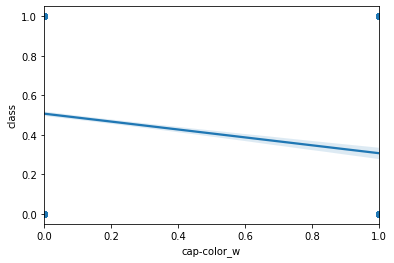

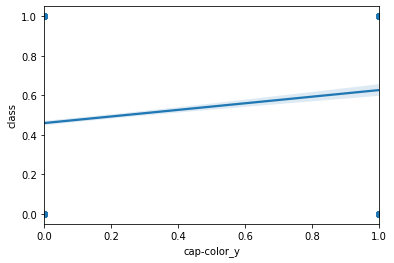

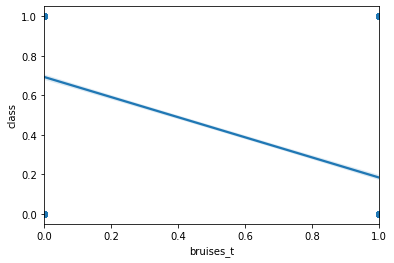

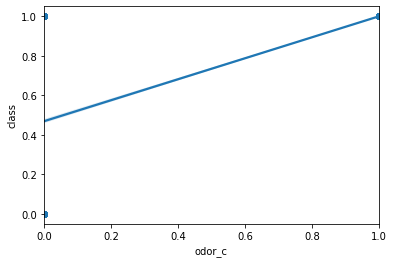

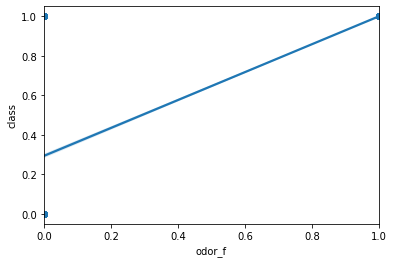

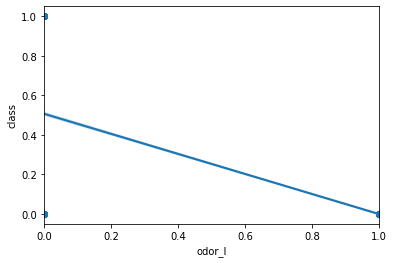

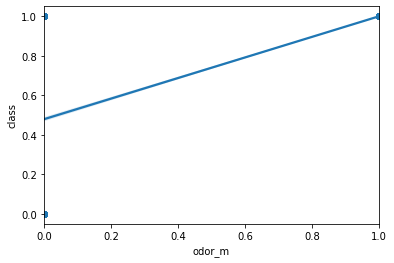

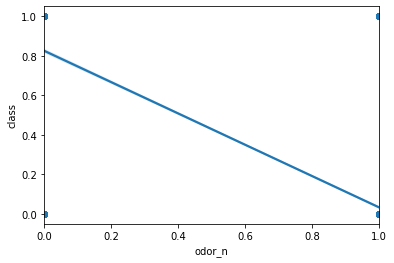

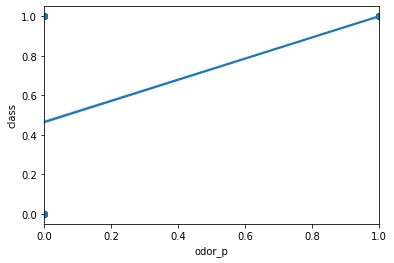

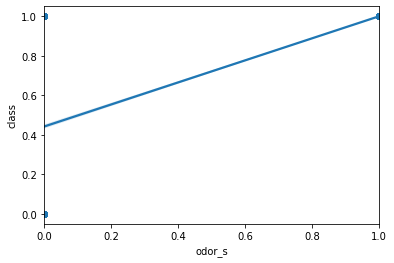

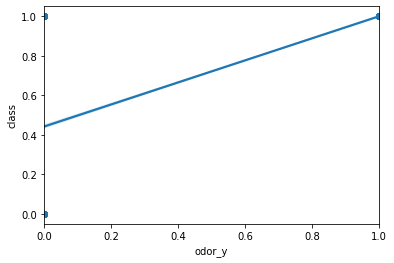

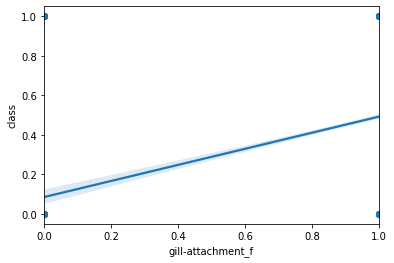

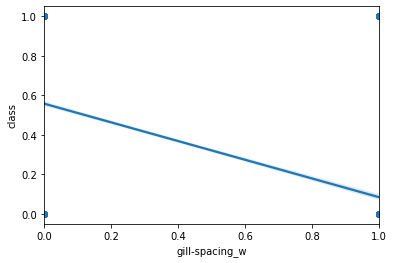

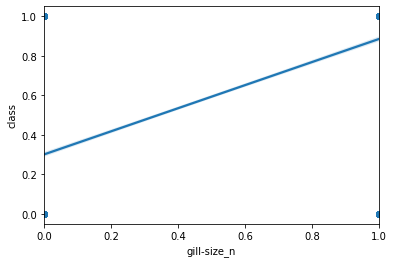

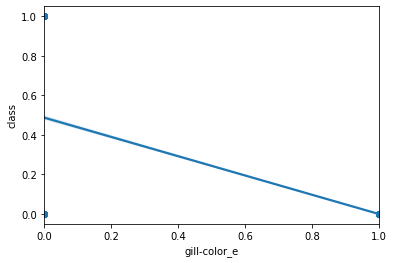

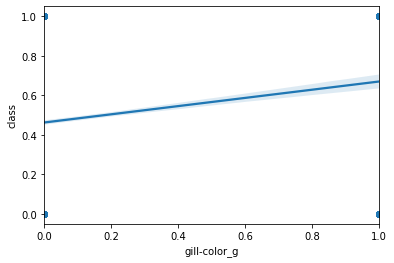

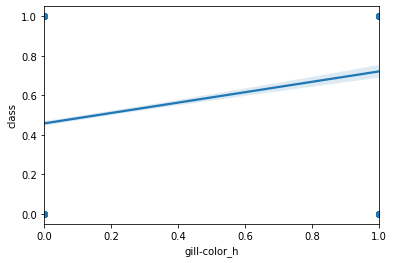

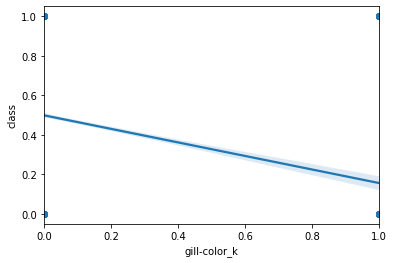

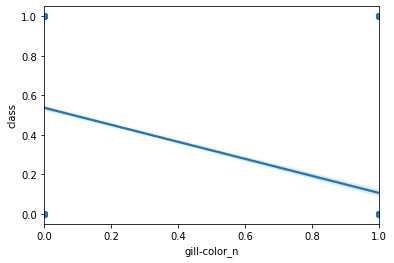

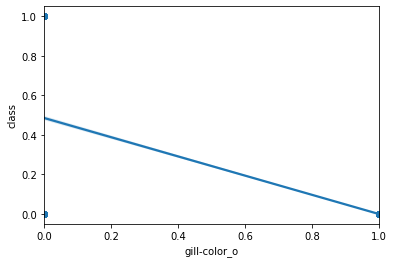

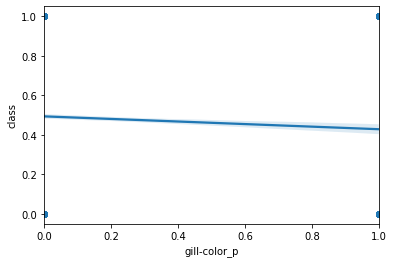

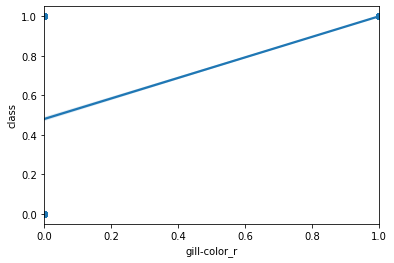

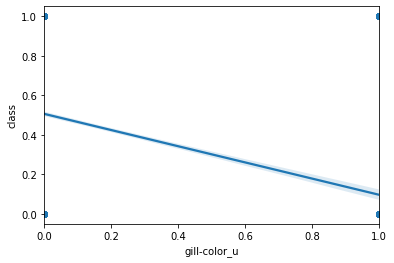

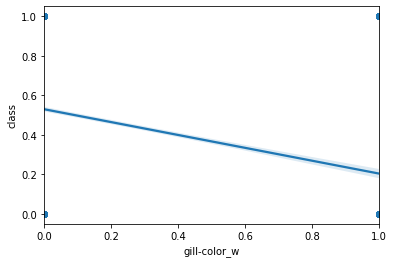

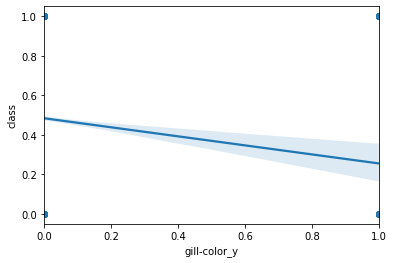

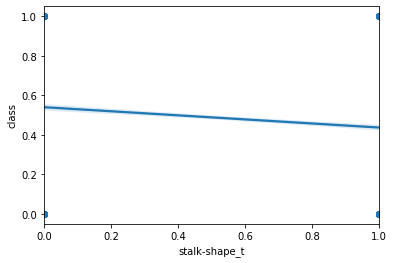

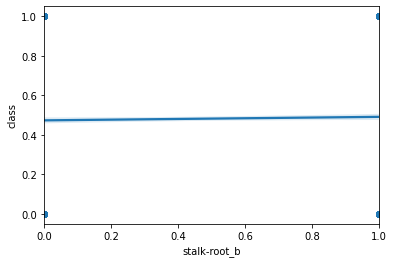

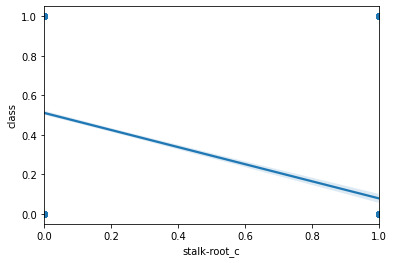

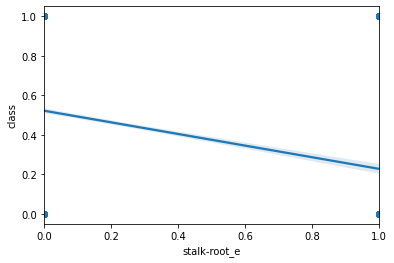

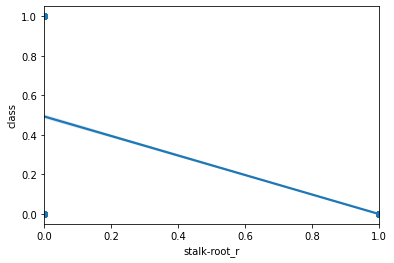

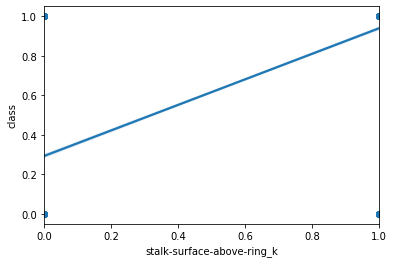

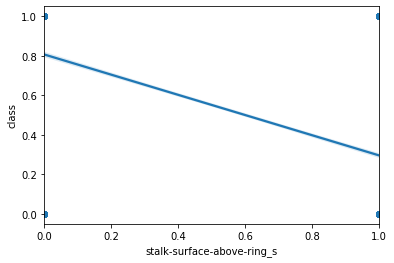

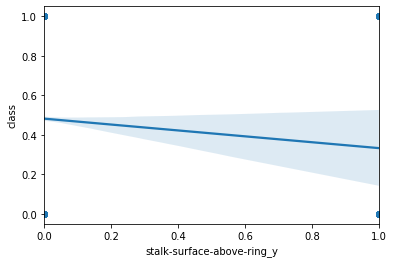

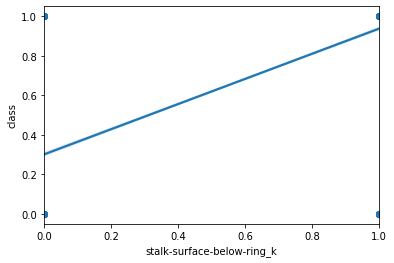

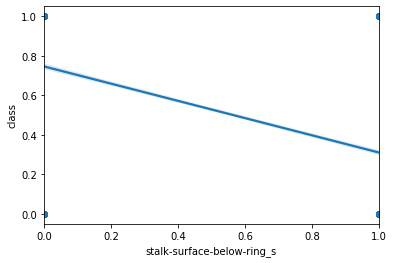

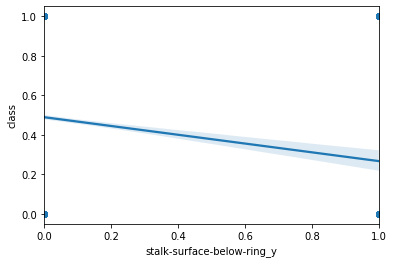

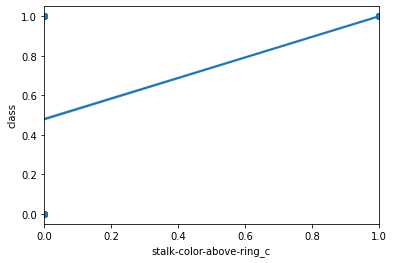

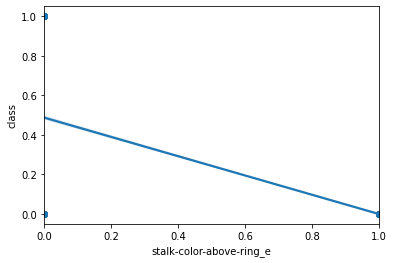

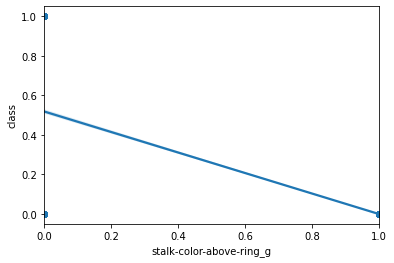

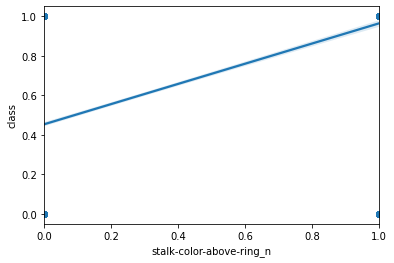

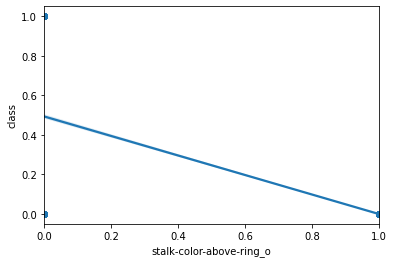

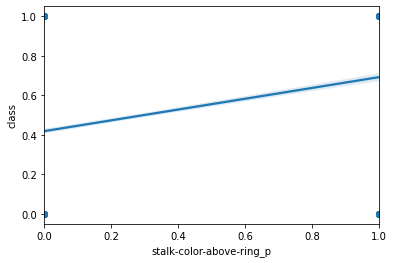

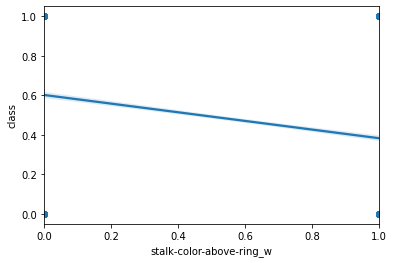

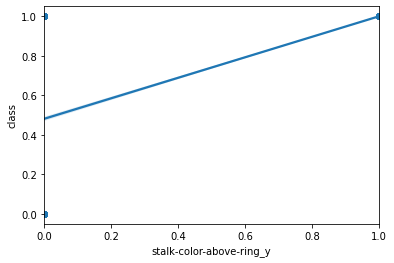

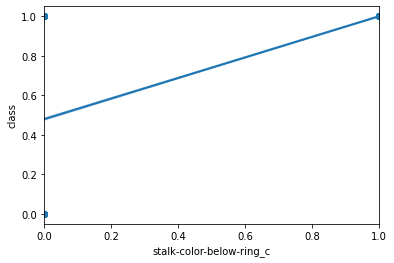

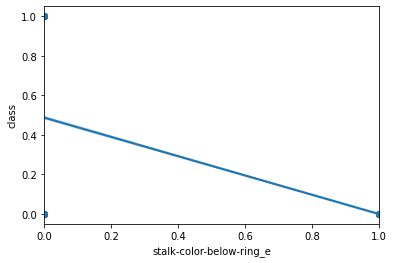

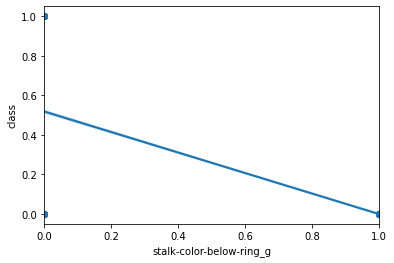

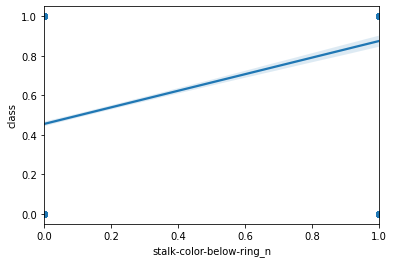

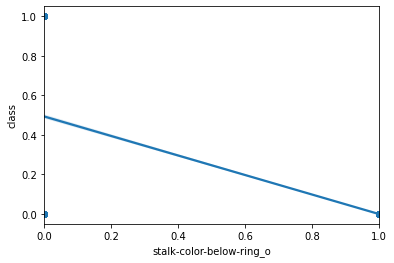

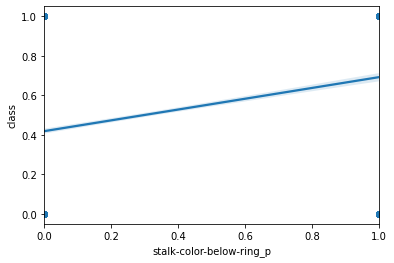

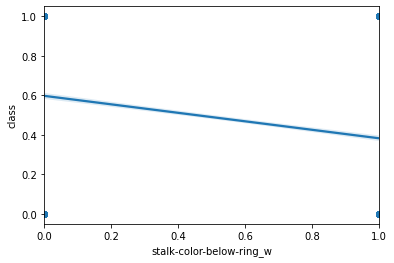

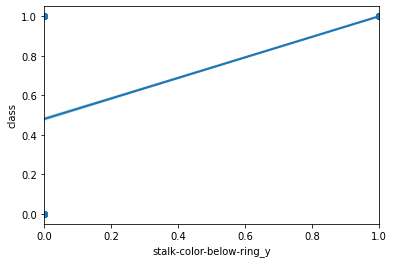

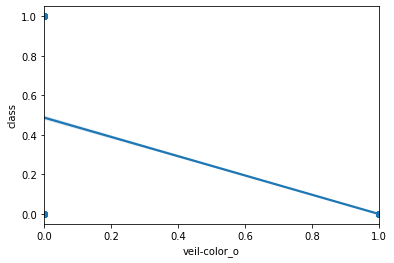

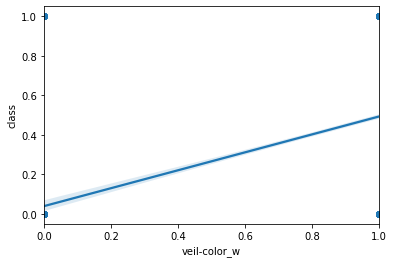

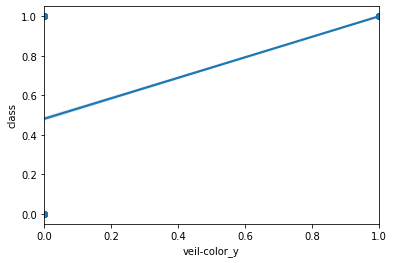

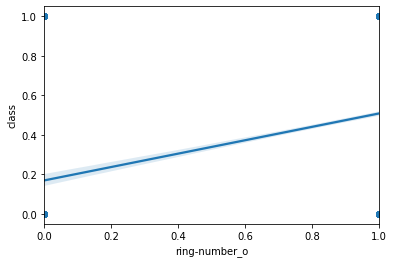

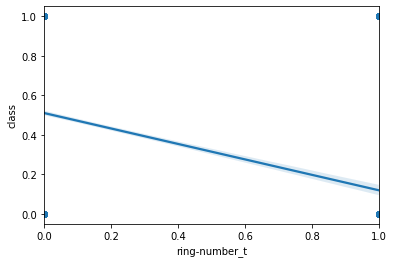

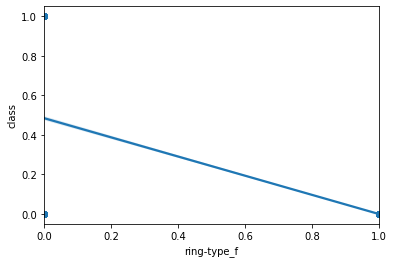

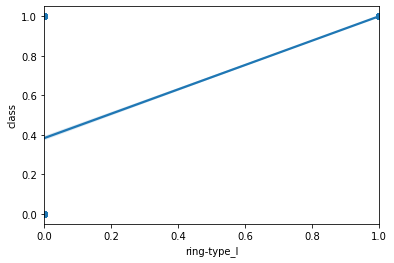

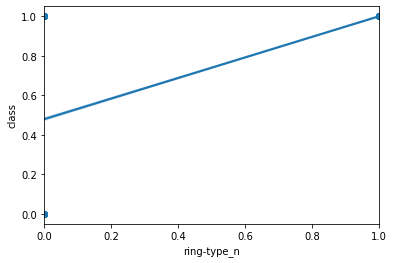

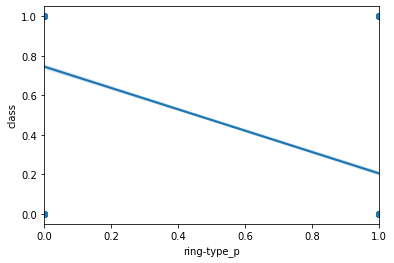

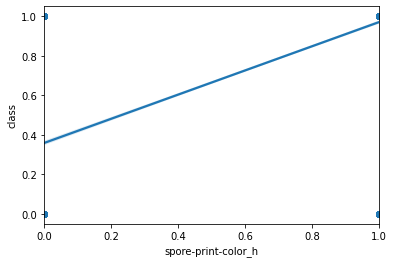

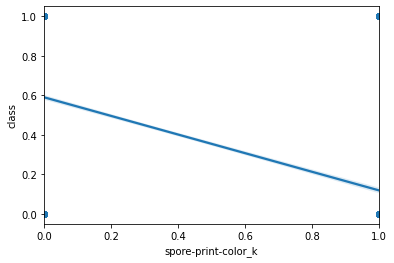

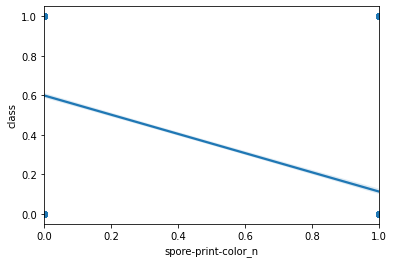

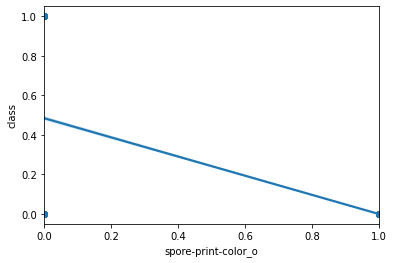

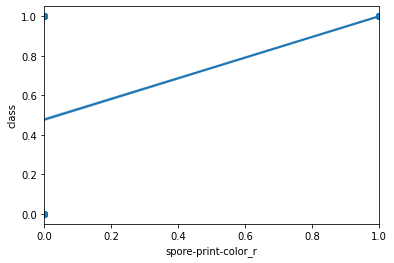

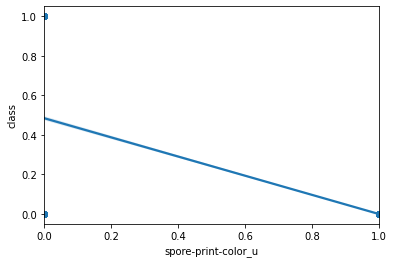

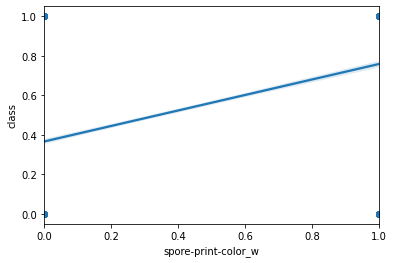

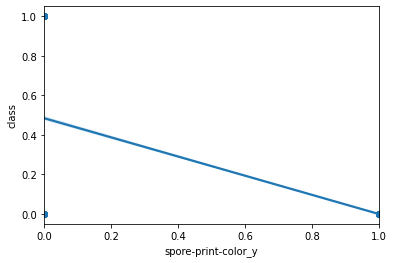

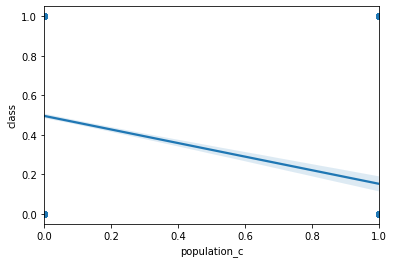

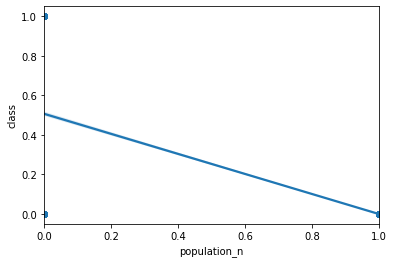

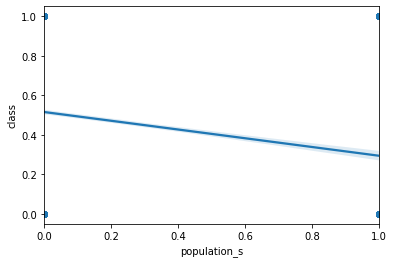

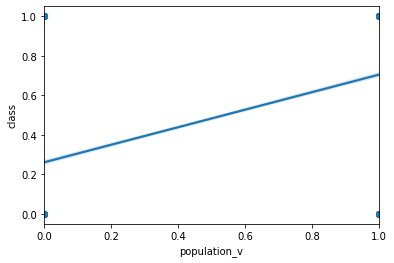

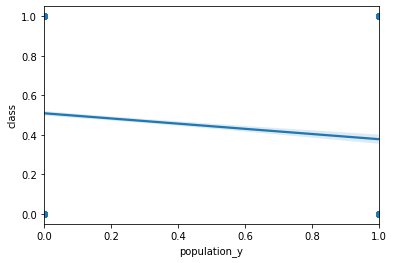

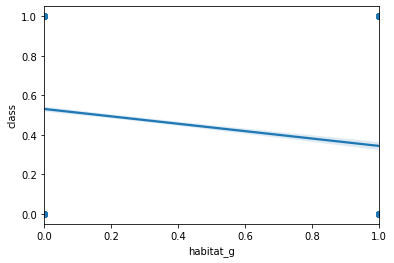

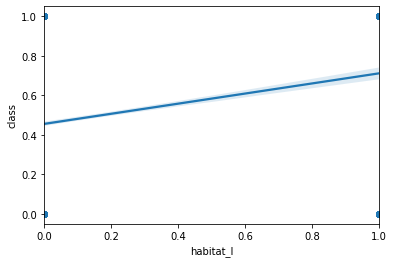

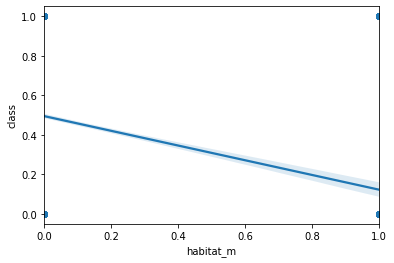

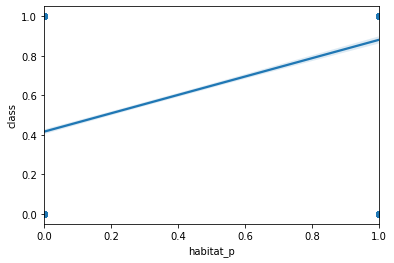

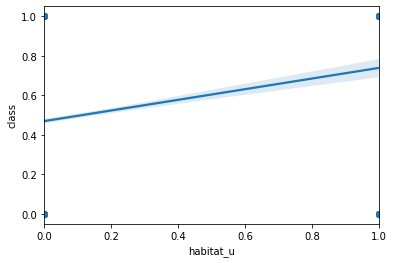

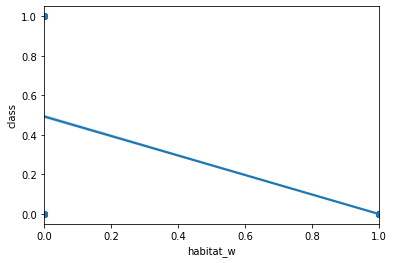

In [55]:
for col in data:
  if col != 'class':
    sns.regplot(data[col],data['class'],data=data)
    plt.show()

In [56]:
y = data.pop('class')
x = data

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 100)

In [60]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
from sklearn.metrics import accuracy_score,f1_score

In [62]:
pred_y = model.predict(x_test)
score = accuracy_score(y_test,y_pred=pred_y)
f1 = f1_score(y_test,y_pred=pred_y,average=None)

In [63]:
print(f'Average score is {score*100} %')
print(f'edible score is {f1[0]*100} %')
print(f'poisonous score is {f1[1]*100} %')

Average score is 100.0 %
edible score is 100.0 %
poisonous score is 100.0 %
